In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

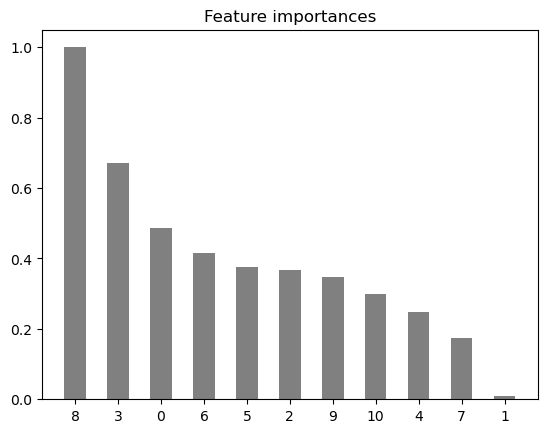

In [3]:
df = pd.read_excel(r'..\..\Data\相关性最新.xlsx')
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
aver = X.mean(axis=0)
X = X.fillna(aver)
from model.UniVarSelector import UniVarSelector
%matplotlib inline
uni = UniVarSelector(X, y)
uni.fit()
uni.plot()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    'n_estimators': 500, # 弱分类器的个数
    'max_depth': 3,       # 弱分类器（CART回归树）的最大深度
    'min_samples_split': 5, # 分裂内部节点所需的最小样本数
    'learning_rate': 0.03,  # 学习率
    'loss': 'squared_error',
    'subsample': 1.0

}
GBDTreg = GradientBoostingRegressor(**params)
GBDTreg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, min_samples_split=5,
                          n_estimators=500)

In [32]:
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)             # 训练

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(GBDTreg, X_train, X_test, y_train, y_test)

训练集精度:
0.9916369037232226

测试集精度:
0.48529857872800064

分类识别报告:


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
params = {
    'n_estimators': 50, # 弱分类器的个数
    'max_depth': 3,       # 弱分类器（CART回归树）的最大深度
    'min_samples_split': 3, # 分裂内部节点所需的最小样本数
    'learning_rate': 0.02,  # 学习率
    'loss': 'deviance',
    'subsample': 0.8,
    'random_state': 1
}
GBDTClf = GradientBoostingClassifier(**params)
train_and_evaluate(GBDTClf, X_train, X_test, y_train, y_test)

训练集精度:
0.953125

测试集精度:
0.78125

分类识别报告:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.75      0.86         4
           3       0.91      0.77      0.83        13
           4       0.67      0.91      0.77        11
           5       0.50      0.33      0.40         3

    accuracy                           0.78        32
   macro avg       0.82      0.75      0.77        32
weighted avg       0.80      0.78      0.78        32



In [46]:
train_and_evaluate(GBDTClf, X_train, X_test, y_train, y_test)

训练集精度:
0.8203125

测试集精度:
0.71875

分类识别报告:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.25      0.40         4
           3       1.00      0.77      0.87        13
           4       0.55      1.00      0.71        11
           5       0.00      0.00      0.00         3

    accuracy                           0.72        32
   macro avg       0.71      0.60      0.60        32
weighted avg       0.75      0.72      0.68        32



In [ ]:
{'exponential', 'deviance' (deprecated), 'log_loss'}